In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

import gzip
import re
import warnings
warnings.simplefilter("ignore")

### 创建有向图

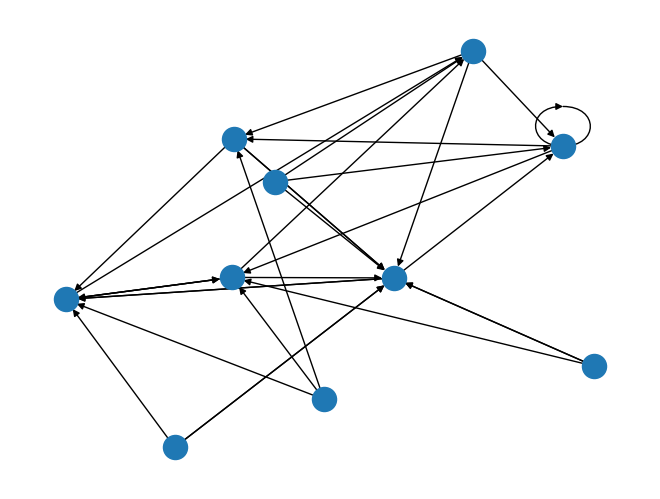

In [2]:
# 图是随机的，有可能产生环，如下
seed = 13648
G = nx.random_k_out_graph(10,3,0.5,seed=seed)
pos = nx.spring_layout(G,seed=seed)
nx.draw(G,pos,with_labels=False)

### 高级可视化设置

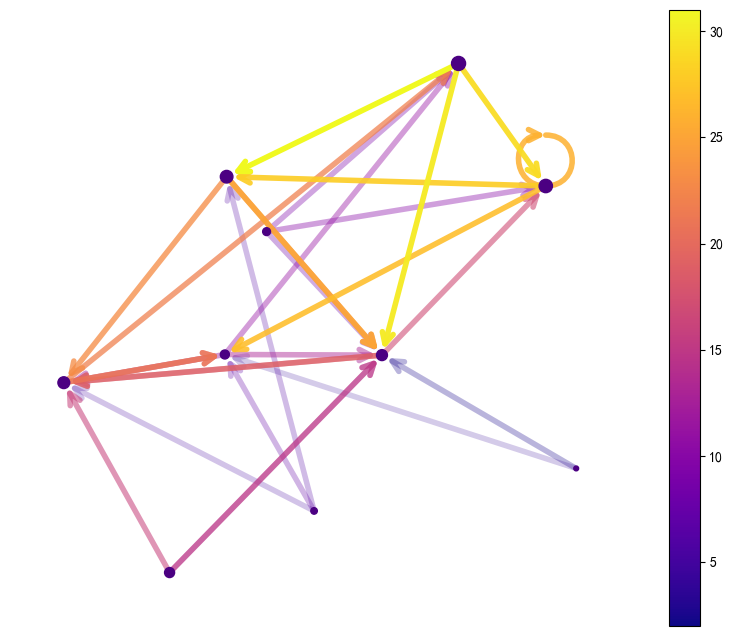

In [3]:
# 节点大小
node_size = [12 + 10 * i for i in range(len(G))]
# 节点颜色
M = G.number_of_edges()
edge_colors = range(2,M+2)
# 节点透明度
edge_alphas = [(5+i)/(M+4) for i in range(M)]
# 配色方案
cmap = plt.cm.plasma
# 绘制节点
plt.figure(figsize=(10,8))
nodes = nx.draw_networkx_nodes(G,pos,node_size=node_size,node_color="indigo")
# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_size,
    arrowstyle="->",
    arrowsize = 20,
    edge_color=edge_colors,
    edge_cmap = cmap,
    width = 4
)

# 设置每个连接的透明度
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

# 调色图例
pc = mpl.collections.PatchCollection(edges,cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()